# Partition Function

$$
Z=2 \cosh{\beta \mu_B B} = 2 \cosh{\frac{\mu_B B}{k_B T}}
$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
import numpy as np

In [10]:
kB = 8.6173303e-5 # eV K-1

def U(T, E):
    return -E * np.tanh(E / (kB*T))

def F(T, E):
    return -T * kB * np.log(2 * np.cosh(E / (kB*T)))

def S(T, E):
    return -E / T * np.tanh(E / (kB*T)) + kB * np.log(2 * np.cosh(E / (kB*T)))
    
def CV(T, E):
    return kB * T * (E / (kB * T**2) * (- E /(T * kB) * np.tanh(E / (kB * T))**2 + E/(kB* T)+2 * np.tanh(E/(kB*T))-2 * E/(T**2 * kB)*np.tanh(E/(kB * T))) )
    
funcs = [U, F, S, CV]

C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in cosh
  import sys
C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in cosh
  # Remove the CWD from sys.path while we load stuff.


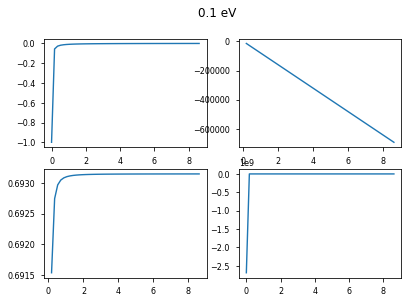

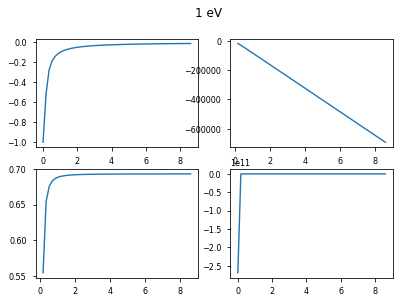

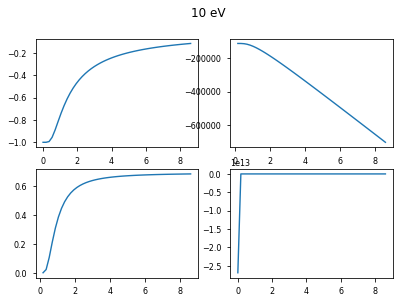

In [25]:
T = np.linspace (0.1, 1000000)
x =  kB / E * T
energies = [.1, 1, 10]
for E in energies:
    plt.figure()
    plt.suptitle('{} eV'.format(E))
    
    plt.subplot(221)
    plt.plot(x, U(T, E) / E)
    plt.subplot(222)
    plt.plot(x, F(T, E)/kB)
    plt.subplot(223)
    plt.plot(x, S(T, E)/kB)
    plt.subplot(224)
    plt.plot(x, CV(T, E)/kB)
    
